[View in Colaboratory](https://colab.research.google.com/github/KenJiangg/Exploring-Datasets-/blob/master/GooglePlayEDA.ipynb)

I am working on Google Colab. so I need to add this in order to access the files 

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Libraries I will be using


In [0]:
import pandas as pd
import numpy as np

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

Read Files 

In [0]:
app_review = pd.read_csv('drive/My Drive/Kaggle/Google Play Dataset/googleplaystore.csv')
app_play = pd.read_csv('drive/My Drive/Kaggle/Google Play Dataset/googleplaystore_user_reviews.csv')

Checking the files

In [70]:
app_review.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [71]:
app_play.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


# Comparison between High Rating (4.5+) and # of Reviews

Find all the apps who achieve 4.5 or higher 

In [0]:
high_rating = app_review[app_review['Rating']>4.5]

In [73]:
high_rating.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up
13,Mandala Coloring Book,ART_AND_DESIGN,4.6,4326,21M,"100,000+",Free,0,Everyone,Art & Design,"June 26, 2018",1.0.4,4.4 and up
16,Photo Designer - Write your name with shapes,ART_AND_DESIGN,4.7,3632,5.5M,"500,000+",Free,0,Everyone,Art & Design,"July 31, 2018",3.1,4.1 and up
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31M,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",5.5.4,4.1 and up


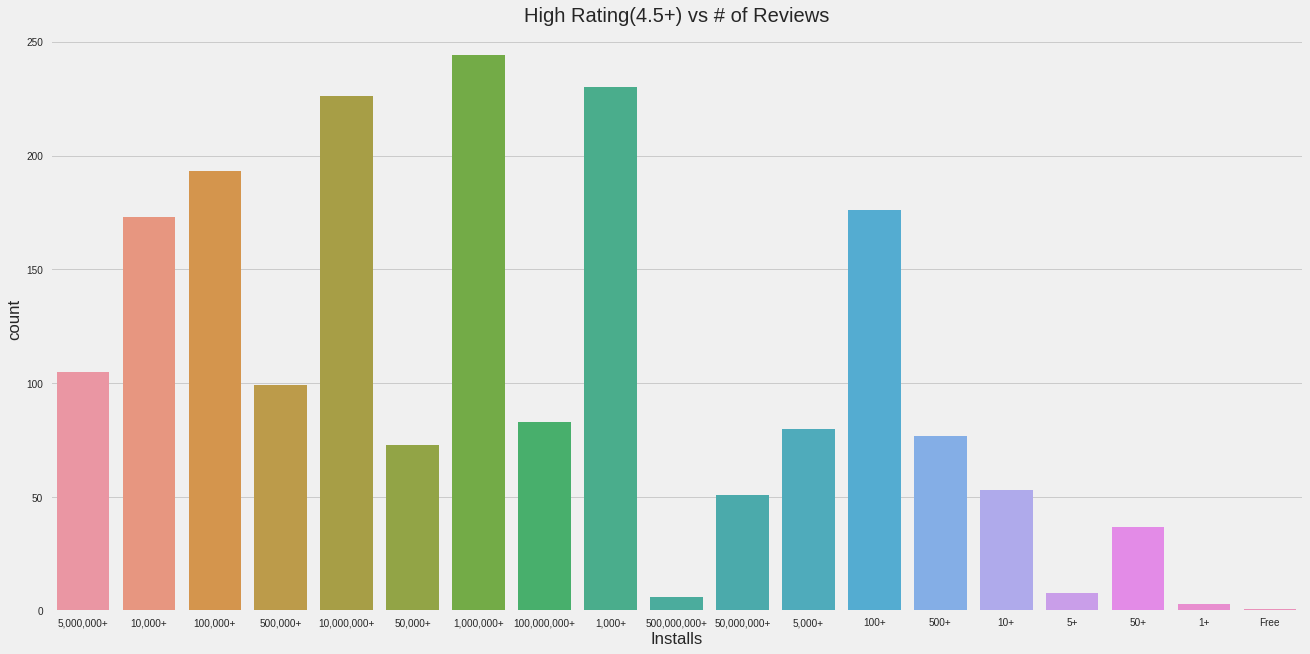

In [74]:
plt.figure(figsize=(20,10))
plt.tight_layout()
plt.title('High Rating(4.5+) vs # of Reviews')
ax=sns.countplot(x='Installs',data= high_rating)

We are looking if there is a correlation between the number of installs and high rating therefore we need to order by installs. Lets fix that! 

First lets remove the (+) in order to compare integers and sort by the comparison

In [0]:
high_rating['Installs'] = high_rating['Installs'].astype(str).str[:-1]
high_rating['Installs'] = high_rating['Installs'].str.replace(',', '')
high_rating['Installs']= pd.to_numeric(high_rating['Installs'], errors='coerce').fillna(0).astype(np.int64)
high_rating = high_rating.sort_values('Installs')

In [76]:
high_rating.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",0,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10697,Mu.F.O.,GAME,5.0,2,16M,1,Paid,$0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25M,1,Free,0,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
5917,Ra Ga Ba,GAME,5.0,2,20M,1,Paid,$1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
2484,Clinic Doctor EHr,MEDICAL,5.0,2,7.1M,5,Free,0,Everyone,Medical,"August 3, 2018",1.0.51.0.3,8.0 and up


Lets remove all the 0's so because I set all the 0's for the ones that didn't list the # of installs 

In [0]:
high_rating = high_rating[high_rating['Installs'] != 0]

In [78]:
high_rating.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10697,Mu.F.O.,GAME,5.0,2,16M,1,Paid,$0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25M,1,Free,0,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
5917,Ra Ga Ba,GAME,5.0,2,20M,1,Paid,$1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
2484,Clinic Doctor EHr,MEDICAL,5.0,2,7.1M,5,Free,0,Everyone,Medical,"August 3, 2018",1.0.51.0.3,8.0 and up
8146,CZ-Help,BOOKS_AND_REFERENCE,5.0,2,1.4M,5,Free,0,Everyone,Books & Reference,"July 13, 2018",0.1,4.4 and up


Let's graph now!

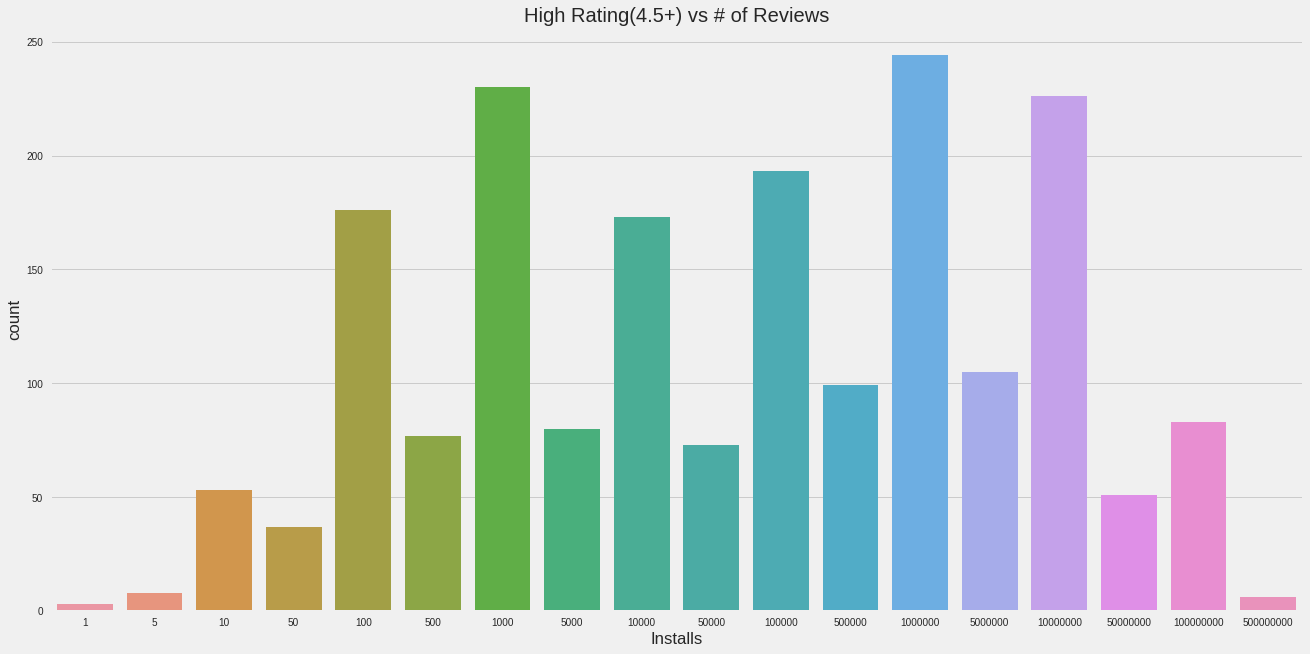

In [79]:
plt.figure(figsize=(20,10))
plt.tight_layout()
plt.title('High Rating(4.5+) vs # of Reviews')
ax=sns.countplot(x='Installs',data= high_rating)

Raw numbers don't seem like a good idea here; let's add a proportion for y axis. Let's first make the original data maniputable too and compare the proportions 

In [0]:
app_review['Installs'] = app_review['Installs'].astype(str).str[:-1]
app_review['Installs'] = app_review['Installs'].str.replace(',', '')
app_review['Installs']= pd.to_numeric(app_review['Installs'], errors='coerce').fillna(0).astype(np.int64)
app_review = app_review.sort_values('Installs')

Lets add another column that tells us if the app has 4.5+ rating 

In [0]:
app_review['4.5+'] = app_review['Rating'].map(lambda x: x > 4.5)

In [82]:
app_review.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,4.5+
9719,EP Cook Book,MEDICAL,NaN,0,3.2M,0,Paid,$200.00,Everyone,Medical,"July 26, 2015",1.0,3.0 and up,False
4465,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.5M,0,Paid,$1.49,Everyone,Personalization,"July 11, 2018",1.1,4.2 and up,False
8614,Sweden Newspapers,NEWS_AND_MAGAZINES,NaN,0,2.1M,0,Free,0,Everyone,News & Magazines,"July 7, 2018",1.1,4.4 and up,False
9905,Eu sou Rico,FINANCE,NaN,0,2.6M,0,Paid,$30.99,Everyone,Finance,"January 9, 2018",1.0,4.0 and up,False
9917,Eu Sou Rico,FINANCE,NaN,0,1.4M,0,Paid,$394.99,Everyone,Finance,"July 11, 2018",1.0,4.0.3 and up,False


There's still data that has NaN rating! Let''s delete those 

In [0]:
app_review = app_review[pd.notnull(app_review['Rating'])]

In [86]:
app_review.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,4.5+
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",0,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,True
5917,Ra Ga Ba,GAME,5.0,2,20M,1,Paid,$1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up,True
10697,Mu.F.O.,GAME,5.0,2,16M,1,Paid,$0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up,True
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25M,1,Free,0,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up,True
7147,CB Heroes,SOCIAL,5.0,5,1.8M,5,Free,0,Everyone,Social,"August 4, 2018",1.2.4,5.0 and up,True


19.0 Rating with 0 Installs? What a great app! 

In [0]:
app_review = app_review[app_review['Category']!= '1.9']

In [88]:
app_review.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,4.5+
5917,Ra Ga Ba,GAME,5.0,2,20M,1,Paid,$1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up,True
10697,Mu.F.O.,GAME,5.0,2,16M,1,Paid,$0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up,True
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25M,1,Free,0,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up,True
7147,CB Heroes,SOCIAL,5.0,5,1.8M,5,Free,0,Everyone,Social,"August 4, 2018",1.2.4,5.0 and up,True
2459,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.0,1,4.6M,5,Free,0,Everyone,Medical,"August 2, 2018",2.0,4.0 and up,True


Better! Let's group the data by if app has rating higher than 4.5 and use the lambda function in python to get a percentage of what apps meet this threshold 

In [102]:
highFilter = app_review.groupby(['Installs','4.5+']).sum()


Rating
Installs   4.5+         
1          True     15.0
5          False     1.5
           True     40.0
10         False    55.2
           True    263.9
50         False    63.9
           True    183.6
100        False   484.6
           True    863.7
500        False   468.3
           True    371.2
1000       False  1803.4
           True   1096.2
5000       False  1360.1
           True    378.5
10000      False  3270.0
           True    810.1
50000      False  1550.5
           True    341.4
100000     False  3826.0
           True    900.8
500000     False  1779.7
           True    462.8
1000000    False  5519.1
           True   1137.2
5000000    False  2704.9
           True    486.0
10000000   False  4347.7
           True   1052.7
50000000   False  1021.0
           True    236.5
100000000  False  1421.1
           True    383.2
500000000  False   285.4
           True     27.8
1000000000 False   247.0

In [104]:
highFilter.groupby(level=0).apply(lambda x: x / x.sum())

Rating
Installs   4.5+           
1          True   1.000000
5          False  0.036145
           True   0.963855
10         False  0.172987
           True   0.827013
50         False  0.258182
           True   0.741818
100        False  0.359416
           True   0.640584
500        False  0.557832
           True   0.442168
1000       False  0.621948
           True   0.378052
5000       False  0.782296
           True   0.217704
10000      False  0.801451
           True   0.198549
50000      False  0.819546
           True   0.180454
100000     False  0.809427
           True   0.190573
500000     False  0.793623
           True   0.206377
1000000    False  0.829154
           True   0.170846
5000000    False  0.847692
           True   0.152308
10000000   False  0.805070
           True   0.194930
50000000   False  0.811928
           True   0.188072
100000000  False  0.787618
           True   0.212382
500000000  False  0.911239
           True   0.088761
1000000000 False  1.000000